# Titanic dataset

## import libraries

In [305]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import seaborn as sns

## load dataset

In [306]:
df = sns.load_dataset("titanic")

In [307]:
df.shape

(891, 15)

In [308]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [309]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

## creat datadict

* #### Check Data Types

In [310]:
datatypes = pd.DataFrame(df.dtypes, columns=["data types"])

In [311]:
datatypes

,data types
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object


In [312]:
# check number of uniqe values for object datatypes
{col:df[col].nunique() for col in df if df[col].dtype==object}

{'sex': 2, 'embarked': 3, 'who': 3, 'embark_town': 3, 'alive': 2}

In [313]:
df= df.astype(
    {
        'alive':'category',
        'sex':'category',
        'embarked':'category',
        'who':'category',
        'embark_town':'category',   
    }
)

In [314]:
# check codes in categorial data
df["alive"].cat.categories

Index(['no', 'yes'], dtype='object')

In [315]:
df["sex"].cat.categories

Index(['female', 'male'], dtype='object')

In [316]:
df.alive = df["alive"].cat.codes

In [317]:
df.sex = df["sex"].cat.codes

In [318]:
datadict = pd.DataFrame(df.dtypes, columns=["dtypes"], dtype=str)
datadict 

,dtypes
survived,int64
pclass,int64
sex,int8
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,category
class,category
who,category


In [319]:
datadict[datadict["dtypes"]=="category"]

,dtypes
embarked,category
class,category
who,category
deck,category
embark_town,category


In [320]:
datadict[datadict["dtypes"].str.contains("int")]

,dtypes
survived,int64
pclass,int64
sex,int8
sibsp,int64
parch,int64
alive,int8


* #### columns defination

In [321]:
datadict["definations"] = ["Survival",
                                     "A proxy for socio-economic status (SES)",
                                     "Sex" ,
                                     "Age in years" ,
                                     "# of siblings(brother, sister) and spouses ( husband, wife )",
                                     '# of parents / children aboard the Titanic',
                                     'Passenger fare',
                                     'Port of Embarkation', 
                                     "class", 
                                     "sex",
                                     'is adult' ,
                                     'deck',
                                    'Port of Embarkation',
                                    'Survival',
                                    'is alone']
datadict

,dtypes,definations
survived,int64,Survival
pclass,int64,A proxy for socio-economic status (SES)
sex,int8,Sex
age,float64,Age in years
sibsp,int64,"# of siblings(brother, sister) and spouses ( h..."
parch,int64,# of parents / children aboard the Titanic
fare,float64,Passenger fare
embarked,category,Port of Embarkation
class,category,class
who,category,sex


* #### check missing values

In [322]:
datadict['MissingVal'] = df.isnull().sum()
datadict

,dtypes,definations,MissingVal
survived,int64,Survival,0
pclass,int64,A proxy for socio-economic status (SES),0
sex,int8,Sex,0
age,float64,Age in years,177
sibsp,int64,"# of siblings(brother, sister) and spouses ( h...",0
parch,int64,# of parents / children aboard the Titanic,0
fare,float64,Passenger fare,0
embarked,category,Port of Embarkation,2
class,category,class,0
who,category,sex,0


In [323]:
datadict['MissingValPercent'] = datadict['MissingVal'] /  df.shape[0]
datadict

,dtypes,definations,MissingVal,MissingValPercent
survived,int64,Survival,0,0.000000
pclass,int64,A proxy for socio-economic status (SES),0,0.000000
sex,int8,Sex,0,0.000000
age,float64,Age in years,177,0.198653
sibsp,int64,"# of siblings(brother, sister) and spouses ( h...",0,0.000000
parch,int64,# of parents / children aboard the Titanic,0,0.000000
fare,float64,Passenger fare,0,0.000000
embarked,category,Port of Embarkation,2,0.002245
class,category,class,0,0.000000
who,category,sex,0,0.000000


* #### check number of unique values

In [324]:
datadict['NUnique']=df.nunique()
datadict

,dtypes,definations,MissingVal,MissingValPercent,NUnique
survived,int64,Survival,0,0.000000,2
pclass,int64,A proxy for socio-economic status (SES),0,0.000000,3
sex,int8,Sex,0,0.000000,2
age,float64,Age in years,177,0.198653,88
sibsp,int64,"# of siblings(brother, sister) and spouses ( h...",0,0.000000,7
parch,int64,# of parents / children aboard the Titanic,0,0.000000,7
fare,float64,Passenger fare,0,0.000000,248
embarked,category,Port of Embarkation,2,0.002245,3
class,category,class,0,0.000000,3
who,category,sex,0,0.000000,3


* #### checkcount of each column 

In [325]:
datadict['Count']=df.count()
datadict

,dtypes,definations,MissingVal,MissingValPercent,NUnique,Count
survived,int64,Survival,0,0.000000,2,891
pclass,int64,A proxy for socio-economic status (SES),0,0.000000,3,891
sex,int8,Sex,0,0.000000,2,891
age,float64,Age in years,177,0.198653,88,714
sibsp,int64,"# of siblings(brother, sister) and spouses ( h...",0,0.000000,7,891
parch,int64,# of parents / children aboard the Titanic,0,0.000000,7,891
fare,float64,Passenger fare,0,0.000000,248,891
embarked,category,Port of Embarkation,2,0.002245,3,889
class,category,class,0,0.000000,3,891
who,category,sex,0,0.000000,3,891


## Quick look at descriptive statistics

In [326]:
df.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
sex,891.0,0.647587,0.477990,0.00,0.0000,1.0000,1.0,1.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
alive,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000


> data is reletivley imbalanced (see survived mean)

In [327]:
df.describe(include='category').T

,count,unique,top,freq
embarked,889,3,S,644
class,891,3,Third,491
who,891,3,man,537
deck,203,7,C,59
embark_town,889,3,Southampton,644


In [328]:
(df.embark_town.str.get(0) == df.embarked).all()

False

In [329]:
df.loc[df.embark_town.str.get(0) != df.embarked]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,0,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,1,True
829,1,1,0,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,1,True


In [330]:
df.drop("embark_town", axis=1, inplace= True)

## discover the data to get insights

In [331]:
# copy data to avoid corrept the data
titanic = df.copy()

In [332]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,0,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,1,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,1,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,1,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,0,True


## looking for correlations

In [333]:
titanic.corr(numeric_only= True)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.094035,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.908578,-0.543351,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.280328,-0.077221,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.349943,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.182024,0.257307,-0.271832
adult_male,-0.557080,0.094035,0.908578,0.280328,-0.253586,-0.349943,-0.182024,1.000000,-0.557080,0.404744
alive,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
alone,-0.203367,0.135207,0.303646,0.198270,-0.584471,-0.583398,-0.271832,0.404744,-0.203367,1.000000


In [334]:
corrdf = titanic.corr(numeric_only= True)
corrdf.style.background_gradient(cmap="Greens")

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.094035,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.908578,-0.543351,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.280328,-0.077221,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.349943,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.182024,0.257307,-0.271832
adult_male,-0.557080,0.094035,0.908578,0.280328,-0.253586,-0.349943,-0.182024,1.000000,-0.557080,0.404744
alive,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
alone,-0.203367,0.135207,0.303646,0.198270,-0.584471,-0.583398,-0.271832,0.404744,-0.203367,1.000000


In [335]:
corrdf.style.highlight_min(axis=0)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone
survived,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
pclass,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.094035,-0.338481,0.135207
sex,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.908578,-0.543351,0.303646
age,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.280328,-0.077221,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.349943,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.182024,0.257307,-0.271832
adult_male,-0.557080,0.094035,0.908578,0.280328,-0.253586,-0.349943,-0.182024,1.000000,-0.557080,0.404744
alive,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
alone,-0.203367,0.135207,0.303646,0.198270,-0.584471,-0.583398,-0.271832,0.404744,-0.203367,1.000000


In [336]:
mask = np.eye(len(corrdf), dtype=bool)
corrdf.values[mask] = np.nan


In [337]:
corrdf.style.highlight_max(axis=0)

,survived,pclass,sex,age,sibsp,parch,fare,adult_male,alive,alone
survived,nan,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,1.000000,-0.203367
pclass,-0.338481,nan,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.094035,-0.338481,0.135207
sex,-0.543351,0.131900,nan,0.093254,-0.114631,-0.245489,-0.182333,0.908578,-0.543351,0.303646
age,-0.077221,-0.369226,0.093254,nan,-0.308247,-0.189119,0.096067,0.280328,-0.077221,0.198270
sibsp,-0.035322,0.083081,-0.114631,-0.308247,nan,0.414838,0.159651,-0.253586,-0.035322,-0.584471
parch,0.081629,0.018443,-0.245489,-0.189119,0.414838,nan,0.216225,-0.349943,0.081629,-0.583398
fare,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,nan,-0.182024,0.257307,-0.271832
adult_male,-0.557080,0.094035,0.908578,0.280328,-0.253586,-0.349943,-0.182024,nan,-0.557080,0.404744
alive,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.557080,nan,-0.203367
alone,-0.203367,0.135207,0.303646,0.198270,-0.584471,-0.583398,-0.271832,0.404744,-0.203367,nan


In [338]:
corrdf["survived"].abs().sort_values(ascending=False)

alive         1.000000
adult_male    0.557080
sex           0.543351
pclass        0.338481
fare          0.257307
alone         0.203367
parch         0.081629
age           0.077221
sibsp         0.035322
survived           NaN
Name: survived, dtype: float64

survived and alive are same so we dont need alive column in our dataset

In [339]:
titanic.drop("alive", axis="columns", inplace=True)

In [340]:
datadict.loc["adult_male"]

dtypes                   bool
definations          is adult
MissingVal                  0
MissingValPercent         0.0
NUnique                     2
Count                     891
Name: adult_male, dtype: object

In [341]:
corrdf["fare"].abs().sort_values(ascending=False)

pclass        0.549500
alone         0.271832
survived      0.257307
alive         0.257307
parch         0.216225
sex           0.182333
adult_male    0.182024
sibsp         0.159651
age           0.096067
fare               NaN
Name: fare, dtype: float64

## checking missing values

In [342]:
datadict[["MissingVal","MissingValPercent"]].sort_values("MissingValPercent", ascending=False)

,MissingVal,MissingValPercent
deck,688,0.772166
age,177,0.198653
embarked,2,0.002245
embark_town,2,0.002245
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000


In [343]:
datadict.drop("embark_town",axis=0 ,inplace=True)

In [344]:
datadict[["MissingVal","MissingValPercent"]].sort_values("MissingValPercent", ascending=False)

,MissingVal,MissingValPercent
deck,688,0.772166
age,177,0.198653
embarked,2,0.002245
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000
class,0,0.000000


<Axes: >

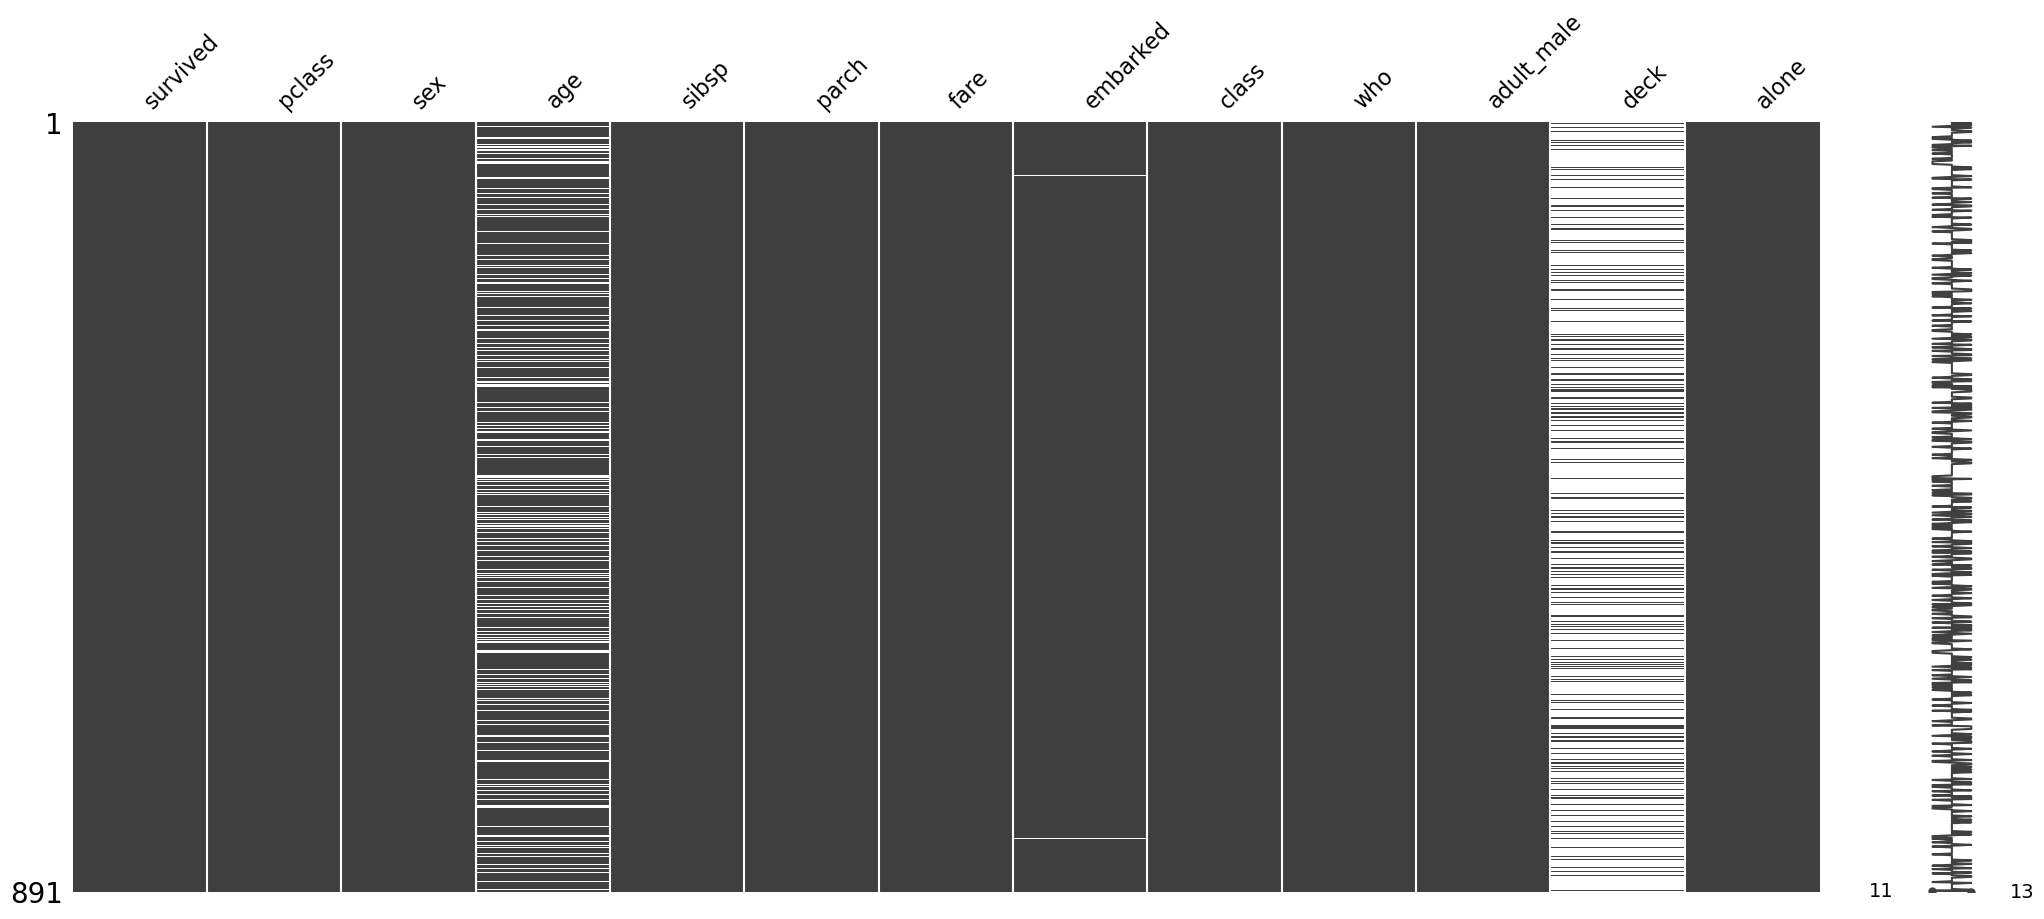

In [345]:
msno.matrix(titanic)

> number of missing values in deck is too much (77%)

In [346]:
titanic.drop("deck", axis="columns", inplace= True)

<Axes: xlabel='age', ylabel='Count'>

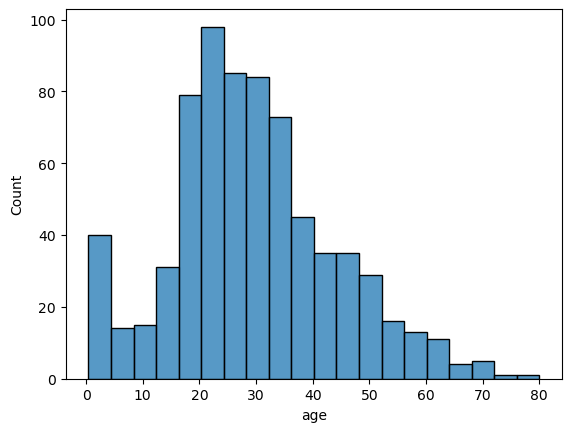

In [347]:
sns.histplot(df.age)

In [352]:
titanic["age"].mean()

29.69911764705882

> age has uniform distribution so lets test filling it with mean

<Axes: xlabel='age', ylabel='Count'>

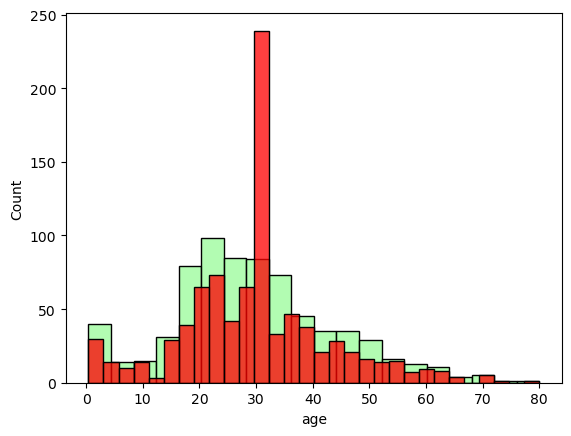

In [353]:
ax = sns.histplot(titanic.age,color="palegreen")
sns.histplot(titanic.age.fillna(titanic["age"].mean()),ax=ax,color="red")

> its not good ..so lets try see corr of age

In [360]:
corrdf["age"].abs().sort_values(ascending=False)

pclass        0.369226
sibsp         0.308247
adult_male    0.280328
alone         0.198270
parch         0.189119
fare          0.096067
sex           0.093254
alive         0.077221
survived      0.077221
age                NaN
Name: age, dtype: float64

In [362]:
df.groupby(["adult_male"]).age.mean()

adult_male
False    24.932458
True     33.173123
Name: age, dtype: float64

In [364]:
df.age.fillna(df.groupby(["adult_male"]).age.transform("mean"))

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    24.932458
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

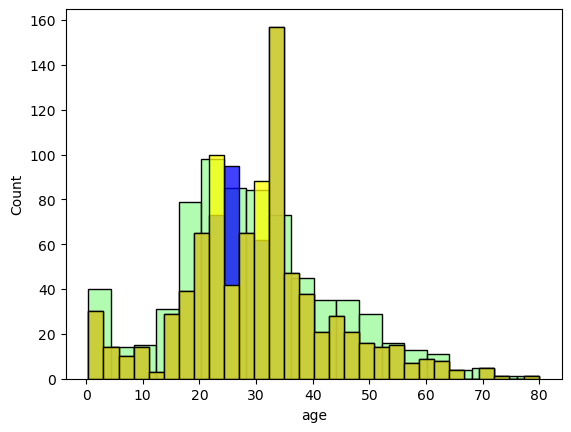

In [374]:
ax = sns.histplot(titanic.age,color="palegreen")
# sns.histplot(titanic.age.fillna(titanic["age"].mean()),ax=ax,color="red")
sns.histplot(df.age.fillna(df.groupby(["adult_male"]).age.transform("mean")),ax=ax,color="red")
sns.histplot(df.age.fillna(df.groupby(["adult_male", "alone"]).age.transform("mean")),ax=ax,color="yellow")


